# Exemplo de separação regional residual utilizando (i) filtro de continuação para cima, (ii) ajuste polinomial simples e (iii) ajuste polinomial robusto.

In [1]:
# Importanto módulos necessários
import numpy
from matplotlib import pyplot
import sys

In [2]:
a = sys.path.append('codes/')

In [3]:
from codes.sphere import sphere_gz

In [4]:
# Numero de pontos e definicao do grid
N = 100
x = numpy.linspace(-3000., 3000., N)
y = numpy.linspace(-3000., 3000., N)

xgrid, ygrid = numpy.meshgrid(x, y)

In [5]:
# Definição da área
area = [x.min(), x.max(), y.min(), y.max()]
xc = 0.5*(area[1] + area[0])
yc = 0.5*(area[3] + area[2])

In [6]:
# Criacao dos modelos de esfera
esf1 = (1000., 1000., 350., 800., 1000.)
esf2 = (-1200., -1200., 500., 1000., 900.)

In [7]:
# Calculo da anomalia para as esferas
gz1 = sphere_gz(xgrid, ygrid, -100., esf1)
gz2 = sphere_gz(xgrid, ygrid, -100., esf2)
gz_esfera = gz1 + gz2

In [8]:
# Criação de um campo regional
gz_reg = +30. - 0.00025*(xgrid - xc) + 0.00015*(ygrid - yc) + 0.000001*(xgrid - xc)**2 + 0.000001*(ygrid - yc)**2
gz = gz_reg + gz_esfera

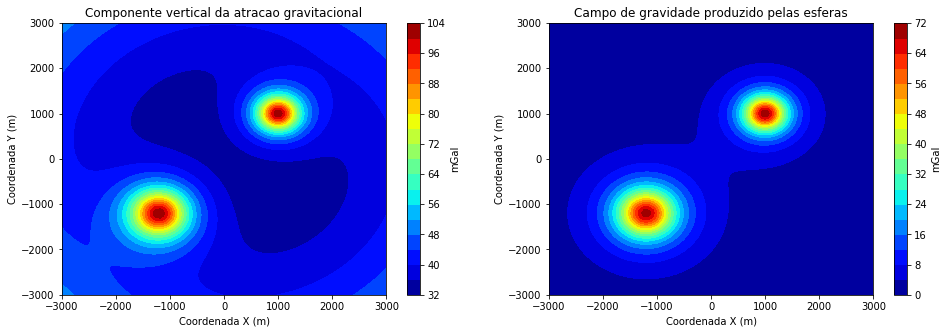

In [9]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(16, 5))

pyplot.subplot(1, 2, 1)
fig1 = pyplot.contourf(xgrid, ygrid, gz, 20, cmap = pyplot.cm.jet)
pyplot.title('Componente vertical da atracao gravitacional')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb1 = pyplot.colorbar()
cb1.set_label('mGal')

pyplot.subplot(1, 2, 2)
fig2 = pyplot.contourf(xgrid, ygrid, gz_esfera, 20, cmap = pyplot.cm.jet)
pyplot.title('Campo de gravidade produzido pelas esferas')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb2 = pyplot.colorbar()
cb2.set_label('mGal')

pyplot.show()

# Separação via continuação para cima

In [10]:
# Importando a função de continuação para cima
from codes.filtering import continuation

In [11]:
# Altura para continuação
h = 1000.

In [12]:
# Dado continuado 
gz_up = continuation(xgrid, ygrid, gz, h)

In [13]:
# Dado residual
gz_res = gz - gz_up

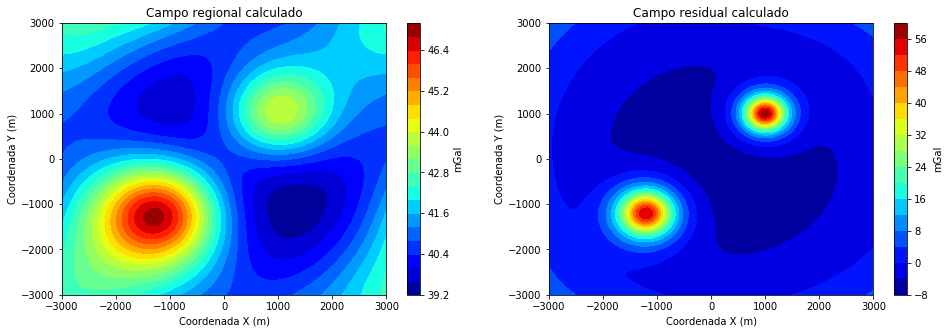

In [14]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(16, 5))

pyplot.subplot(1, 2, 1)
fig3 = pyplot.contourf(xgrid, ygrid, gz_up, 20, cmap = pyplot.cm.jet)
pyplot.title('Campo regional calculado')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb3 = pyplot.colorbar()
cb3.set_label('mGal')

pyplot.subplot(1, 2, 2)
fig4 = pyplot.contourf(xgrid, ygrid, gz_res, 20, cmap = pyplot.cm.jet)
pyplot.title('Campo residual calculado')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb4 = pyplot.colorbar()
cb4.set_label('mGal')

pyplot.show()

# Separação via ajuste simples

In [15]:
# Alterando as formas de cada elemento
xgrid = xgrid.reshape(xgrid.size,)
ygrid = ygrid.reshape(ygrid.size,)
gz = gz.reshape(gz.size,)

In [16]:
# Matriz de posicoes (parâmetros)
A = numpy.vstack((numpy.ones(N*N), xgrid, ygrid, xgrid**2., ygrid**2.)).T

In [17]:
# Calculo do polinomio simples
p1 = numpy.linalg.solve(numpy.dot(A.T,A),numpy.dot(A.T,gz))

In [18]:
# Calculo do regional por ajuste simples
gz_regional1 = numpy.dot(A,p1)

In [19]:
# Calculo do residual simples
gz_residual1 = gz - gz_regional1

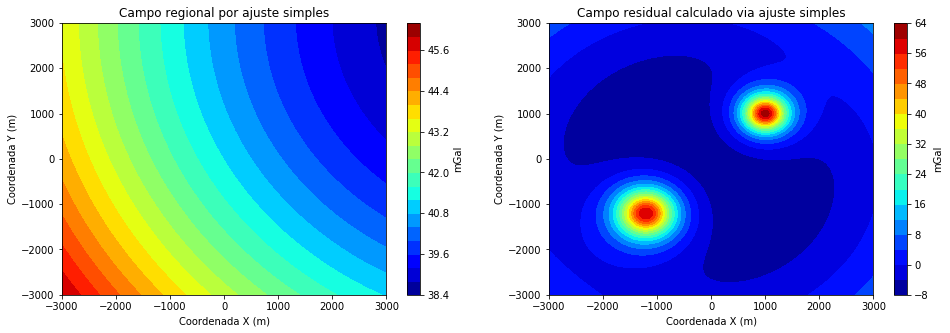

In [20]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(16, 5))

pyplot.subplot(1, 2, 1)
fig5 = pyplot.contourf(xgrid.reshape(N,N), ygrid.reshape(N,N), 
                       gz_regional1.reshape(N,N), 20, cmap = pyplot.cm.jet)
pyplot.title('Campo regional por ajuste simples')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb5 = pyplot.colorbar()
cb5.set_label('mGal')

pyplot.subplot(1, 2, 2)
fig6 = pyplot.contourf(xgrid.reshape(N,N), ygrid.reshape(N,N),
                       gz_residual1.reshape(N,N), 20, cmap = pyplot.cm.jet)
pyplot.title('Campo residual calculado via ajuste simples')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb6 = pyplot.colorbar()
cb6.set_label('mGal')

pyplot.show()

# Separação via ajuste robusto

In [33]:
# Uso do polinomio simples como entrada
p2 = p1.copy()
gz_regional2 = gz_regional1.copy()
#len(gz_regional2)
len(A)

10000

In [22]:
# Quantidade de iteracoes
iteracoes = 30

In [30]:
for i in range (len(gz_regional2)):
    r = gz - gz_regional2
    correction= (1./numpy.abs(r + 1.e-10))
len(correction)

10000

In [23]:
# Calculo do polinomio robusto
for i in range(iteracoes):
    r = gz - gz_regional2
    s = numpy.median(r)
    W = numpy.diag(1./numpy.abs(r + 1.e-10))
    W = numpy.dot(A.T,W)
    p2 = numpy.linalg.solve(numpy.dot(W,A), numpy.dot(W,gz))
    gz_regional2 = numpy.dot(A, p2)

In [ ]:
# Sinal residual calculado
gz_residual2 = gz - gz_regional2

In [ ]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(16, 5))

pyplot.subplot(1, 2, 1)
fig7 = pyplot.contourf(xgrid.reshape(N,N), ygrid.reshape(N,N), 
                       gz_regional2.reshape(N,N), 20, cmap = pyplot.cm.jet)
pyplot.title('Campo regional via polinomio robusto')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb7 = pyplot.colorbar()
cb7.set_label('mGal')

pyplot.subplot(1, 2, 2)
fig8 = pyplot.contourf(xgrid.reshape(N,N), ygrid.reshape(N,N),
                       gz_residual2.reshape(N,N), 20, cmap = pyplot.cm.jet)
pyplot.title('Sinal residual obtido por ajuste robusto')
pyplot.xlabel('Coordenada X (m)')
pyplot.ylabel('Coordenada Y (m)')
cb8 = pyplot.colorbar()
cb8.set_label('mGal')

pyplot.show()

# Dado real

In [ ]:
# Carrega o dado real
xreal, yreal, zreal, bouguer = numpy.loadtxt('north-grav.dat', skiprows=1, usecols=(0, 1, 2, 5), unpack=True)

In [ ]:
# Define o shape de dados para plot
shape = (201, 101)

In [ ]:
X = xreal.reshape(shape)
Y = yreal.reshape(shape)
Z = zreal.reshape(shape)
B = bouguer.reshape(shape)

In [ ]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(18, 12))

pyplot.subplot(1, 2, 1)
fig9 = pyplot.contourf(X, Y, Z, 50, cmap = pyplot.cm.terrain)
pyplot.title('Mapa de elevacao/topografia (metro)')
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb9 = pyplot.colorbar()
cb9.set_ticks(numpy.linspace(zreal.min(), zreal.max(), 15))

pyplot.subplot(1, 2, 2)
fig10 = pyplot.contourf(X, Y, B, 100, cmap = pyplot.cm.jet)
pyplot.title('Mapa de anomalia Bouguer observada (mGal)')
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb10 = pyplot.colorbar()
cb10.set_ticks(numpy.linspace(bouguer.min(), 
                              bouguer.max(), 15))

pyplot.show()

# (1) Continuação para cima

In [ ]:
# Informacoes para a separação via continuação
hmax = numpy.max(zreal)
hmin = numpy.min(zreal)
print('Elevacao maxima e minima:')
print(hmax, '/', hmin)

In [ ]:
# Aplicando a continuação
B_up = continuation(X, Y, B, 50*hmax)

In [ ]:
# Calculo do residual
B_res = B - B_up

In [ ]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(18, 12))

pyplot.subplot(1, 2, 1)
fig11 = pyplot.contourf(X, Y, B_up, 100, cmap = pyplot.cm.jet)
pyplot.title('Mapa Bouguer regional calculado (mGal)')
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb9 = pyplot.colorbar()
cb9.set_ticks(numpy.linspace(B_up.min(), 
                             B_up.max(), 15))

pyplot.subplot(1, 2, 2)
fig12 = pyplot.contourf(X, Y, B_res, 100, cmap = pyplot.cm.jet)
pyplot.title('Mapa de anomalia residual (mGal)')
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb10 = pyplot.colorbar()
cb10.set_ticks(numpy.linspace(B_res.min(), 
                              B_res.max(), 15))

pyplot.show()

# Ajuste simples

In [ ]:
# Define o numero de elementos
N = xreal.size

In [ ]:
# Matriz de posicoes (parâmetros)
A = numpy.vstack((numpy.ones(N), xreal, yreal, xreal**2., yreal**2.)).T

# Calculo do polinomio simples
p1 = numpy.linalg.solve(numpy.dot(A.T,A),numpy.dot(A.T,bouguer))

# Calculo do regional por ajuste simples
bouguer_regional1 = numpy.dot(A,p1)

# Calculo do residual simples
bouguer_residual1 = bouguer - bouguer_regional1

In [ ]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(18, 12))

pyplot.subplot(1, 2, 1)
fig13 = pyplot.contourf(X.reshape(shape), Y.reshape(shape), 
                        bouguer_regional1.reshape(shape), 
                        100, cmap = pyplot.cm.jet)
pyplot.title('Mapa regional calculado por ajuste simples (mGal)', fontsize = 14)
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb9 = pyplot.colorbar()

pyplot.subplot(1, 2, 2)
fig14 = pyplot.contourf(X.reshape(shape), Y.reshape(shape), 
                        bouguer_residual1.reshape(shape), 
                        100, cmap = pyplot.cm.jet)
pyplot.title('Mapa residual via ajuste simples (mGal)', fontsize = 14)
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb10 = pyplot.colorbar()

pyplot.show()

# Via ajuste robusto

In [ ]:
# Uso do polinomio simples como entrada
p2 = p1.copy()
bouguer_regional2 = bouguer_regional1.copy()

In [ ]:
# Define o numero de iteracoes
iteracoes = 50

In [ ]:
# Calculo do polinomio robusto
for i in range(iteracoes):
    r = bouguer - bouguer_regional2
    s = numpy.median(r)
    W = numpy.diag(1./numpy.abs(r + 1.e-10))
    W = numpy.dot(A.T,W)
    p2 = numpy.linalg.solve(numpy.dot(W,A), numpy.dot(W,bouguer))
    bouguer_regional2 = numpy.dot(A, p2)

In [ ]:
# Sinal residual calculado
bouguer_residual2 = bouguer - bouguer_regional2

In [ ]:
# Mapa de anomalia
pyplot.close('all')
pyplot.figure(figsize=(18, 12))

pyplot.subplot(1, 2, 1)
fig13 = pyplot.contourf(X.reshape(shape), Y.reshape(shape), 
                        bouguer_regional2.reshape(shape), 
                        100, cmap = pyplot.cm.jet)
pyplot.title('Sinal regional via ajuste robusto (mGal)', fontsize = 14)
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb9 = pyplot.colorbar()

pyplot.subplot(1, 2, 2)
fig14 = pyplot.contourf(X.reshape(shape), Y.reshape(shape), 
                        bouguer_residual2.reshape(shape), 
                        100, cmap = pyplot.cm.jet)
pyplot.title('Residual calculado com ajuste robusto (mGal)', fontsize = 14)
pyplot.xlabel('Leste (metros)', fontsize = 14)
pyplot.ylabel('Norte (metros)', fontsize = 14)
cb10 = pyplot.colorbar()

pyplot.show()